In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv("diabetes.csv")

# Display first few rows
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# Define independent (X) and dependent (Y) variables
X = df.drop(columns=['Outcome'])  # Features
y = df['Outcome']  # Target

# Split into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Feature Scaling (Improves model performance)
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

# Train the Naïve Bayes Model
gaussian = GaussianNB()
gaussian.fit(xtrain, ytrain)

# Predictions
y_pred_train = gaussian.predict(xtrain)
y_pred_test = gaussian.predict(xtest)


In [6]:
# Model Evaluation
train_accuracy = accuracy_score(ytrain, y_pred_train)
test_accuracy = accuracy_score(ytest, y_pred_test)
precision = precision_score(ytest, y_pred_test, average='binary')
recall = recall_score(ytest, y_pred_test, average='binary')

# Confusion Matrix
cm = confusion_matrix(ytest, y_pred_test)

In [7]:
# Display Results
print(f"\nTrain Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nConfusion Matrix:\n", cm)


Train Accuracy: 0.75
Test Accuracy: 0.77
Precision: 0.66
Recall: 0.71

Confusion Matrix:
 [[79 20]
 [16 39]]


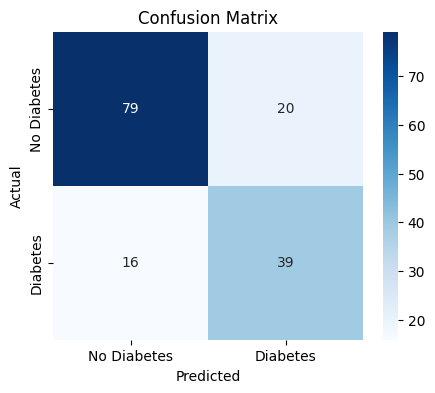

In [8]:
# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()